

### Шаг 1. Загрузите данные и подготовьте их к анализу
1. Загрузите данные о визитах, заказах и расходах в переменные. 
2. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. 
3. Путь к файлам: /datasets/visits_log.csv /datasets/orders_log.csv /datasets/costs.csv
---
### Шаг 2. Постройте отчеты и посчитайте метрики
#### Продукт
1. Сколько людей пользуются в день, неделю, месяц?
2. Сколько сессий в день?
3. Сколько длится одна сессия?
4. Как часто люди возвращаются?

#### Продажи
1. Когда люди начинают покупать?
2. Сколько раз покупают за период?
3. Какой средний чек?
4. Сколько денег приносят? (LTV)

#### Маркетинг
1. Сколько денег потратили? Всего / на каждый источник / по времени
2. Сколько стоило привлечение одного покупателя из каждого источника?
3. На сколько окупились расходы? (ROI)
4. Отобразите на графиках, как эти метрики отличаются по устройствам и по рекламным источникам? Как они меняются во времени?
---
### Шаг 3. Напишите вывод: порекомендуйте маркетологам, куда и сколько им стоит вкладывать денег?
#### Какие источники/платформы вы бы порекомендовали? 
1. Объясните свой выбор: на какие метрики вы ориентируетесь? 
2. Почему? 
3. Какие выводы вы сделали, узнав значение метрик?

### Описание данных

#### Таблица visits (лог сервера с информацией о посещениях сайта):
* Uid — уникальный идентификатор пользователя
* Device — категория устройства пользователя
* Start Ts — дата и время начала сессии
* End Ts — дата и время окончания сессии
* Source Id — идентификатор рекламного источника, из которого пришел пользователь

#### Таблица orders (информация о заказах):
* Uid — уникальный пользователя, который сделал заказ
* Buy Ts — дата и время заказа
* Revenue — выручка Яндекс.Афиши с этого заказа

#### Таблица costs (информация о затратах на маркетинг):
* source_id — идентификатор рекламного источника
* dt — дата
* costs — затраты на этот рекламный источник в этот день

---
---

## Шаг 1. Загрузите данные и подготовьте их к анализу

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

In [3]:
def firstlook(df):
    print(f'Размер датафрейма \n{df.shape}')
    print()
    print('Info')
    print(f'{df.info()}')
    print()
    print(f'Доля пропущенных значений \n {df.isna().sum()/df.shape[0]}')
    print()
    print(f'Количество дубликатов \n {costs.duplicated().sum()}')
    print()
    return visits.describe().style.format("{:.0f}")

## Датафрейм Visits

In [4]:
firstlook(visits)

Размер датафрейма 
(358532, 5)

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358532 entries, 0 to 358531
Data columns (total 5 columns):
Uid          358532 non-null uint64
Device       358532 non-null object
End Ts       358532 non-null object
Source Id    358532 non-null int64
Start Ts     358532 non-null object
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None

Доля пропущенных значений 
 Uid          0.0
Device       0.0
End Ts       0.0
Source Id    0.0
Start Ts     0.0
dtype: float64

Количество дубликатов 
 0



,Uid,Source Id
count,358532,358532
mean,9202607055077392384,4
std,5298200272346094592,2
min,11863502262781,1
25%,4613706364100929536,3
50%,9227412908740601856,4
75%,13727927139481282560,5
max,18446676030785673216,10


In [5]:
visits.head()

,Uid,Device,End Ts,Source Id,Start Ts
0,16879256277535980062,touch,20.12.2017 17:38,4,20.12.2017 17:20
1,104060357244891740,desktop,19.02.2018 17:21,2,19.02.2018 16:53
2,7459035603376831527,touch,01.07.2017 1:54,5,01.07.2017 1:54
3,16174680259334210214,desktop,20.05.2018 11:23,9,20.05.2018 10:59
4,9969694820036681168,desktop,27.12.2017 14:06,3,27.12.2017 14:06


### Visits
* Необходимо привести даты (End Ts, Start Ts) в формат datetime
* Уберем пробелы в названии колонок

In [6]:
visits = visits.rename(columns={'Source Id':'source_id', 
                               'Device':'device', 
                               'Uid':'uid', 
                               'Start Ts':'start_ts',
                                'End Ts':'end_ts'})

In [7]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format = '%d.%m.%Y %H:%M')
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format = '%d.%m.%Y %H:%M')

---

## Датафрейм orders

In [8]:
firstlook(orders)

Размер датафрейма 
(50415, 3)

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None

Доля пропущенных значений 
 Buy Ts     0.0
Revenue    0.0
Uid        0.0
dtype: float64

Количество дубликатов 
 0



,uid,source_id
count,358532,358532
mean,9202607055077392384,4
std,5298200272346094592,2
min,11863502262781,1
25%,4613706364100929536,3
50%,9227412908740601856,4
75%,13727927139481282560,5
max,18446676030785673216,10


In [9]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


### Orders
* Необходимо привести время покупки в формат datetime
* Заменить пробелы на нижнее подчеркивание в названии колонок

In [10]:
orders.columns = [i.replace(' ','_') for i in orders.columns]

In [11]:
orders['Buy_Ts'] = pd.to_datetime(orders['Buy_Ts'])

In [12]:
orders.columns = [columns.lower() for columns in orders]

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [14]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


---

## Датафрейм costs

In [15]:
firstlook(costs)

Размер датафрейма 
(2542, 3)

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None

Доля пропущенных значений 
 source_id    0.0
dt           0.0
costs        0.0
dtype: float64

Количество дубликатов 
 0



,uid,source_id
count,358532,358532
mean,9202607055077392384,4
std,5298200272346094592,2
min,11863502262781,1
25%,4613706364100929536,3
50%,9227412908740601856,4
75%,13727927139481282560,5
max,18446676030785673216,10


In [16]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [17]:
costs.source_id.unique()

array([ 1,  2,  3,  4,  5,  9, 10])

### costs
Даты необходимо привести в формат datetime

In [18]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [19]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


---
---
---

# Шаг 2. Постройте отчеты и посчитайте метрики

## Продукт
* Сколько людей пользуются в день, неделю, месяц?
* Сколько сессий в день?
* Сколько длится одна сессия?
* Как часто люди возвращаются?

#### Для ответа на эти вопросы, мы исследуем датафрейм visits

---

## Сколько людей пользуются в день, неделю, месяц?
* Найдем количество уникальных UID в день, неделю и месяц. Или по другому vanity metrics, или DAU/WAU/MAU
* Учтем, что в датафрейме статистика за 2 года, поэтому надо выделять год и учитывать его в агрегации

In [20]:
visits['month'] = visits['start_ts'].dt.month
visits['date'] = visits['start_ts'].dt.day
visits['week'] = visits['start_ts'].dt.week
visits['year'] = visits['start_ts'].dt.year

In [21]:
visits.head()

,uid,device,end_ts,source_id,start_ts,month,date,week,year
0,16879256277535980062,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,12,20,51,2017
1,104060357244891740,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,2,19,8,2018
2,7459035603376831527,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7,1,26,2017
3,16174680259334210214,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,5,20,20,2018
4,9969694820036681168,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,12,27,52,2017


In [22]:
def product_metrics(df):
    metrics_dict = {'date':'DAU','week':'WAU','month':'MAU'}
    for i in metrics_dict.keys():
        if i == 'date':
            temp = df.groupby(['year','month',i]).agg({'uid':'nunique'}) 
        else:
            temp = df.groupby(['year',i]).agg({'uid':'nunique'})
        print(f'{metrics_dict[i]}: Среднее =  {int(temp.mean())}, Медиана = {int(temp.median())}')
        ax = temp.reset_index()['uid'].plot(kind='hist', bins=100)
        ax.set(title=f'Распределение количества уникальных пользователей за период: {i}', ylabel='Частота', xlabel='Количество уников')
        sns.set(rc={'figure.figsize':(9,6)})
        plt.show()
# чтобы охарактеризовать последнее распределение(месяц) одной центральной тенденцией, возможно стоит использовать моду

DAU: Среднее =  907, Медиана = 921


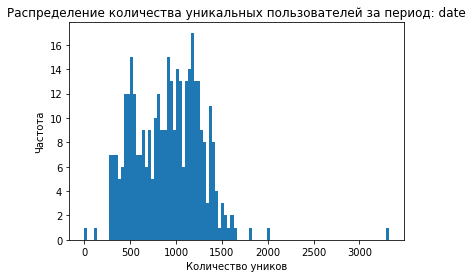

WAU: Среднее =  5716, Медиана = 5740


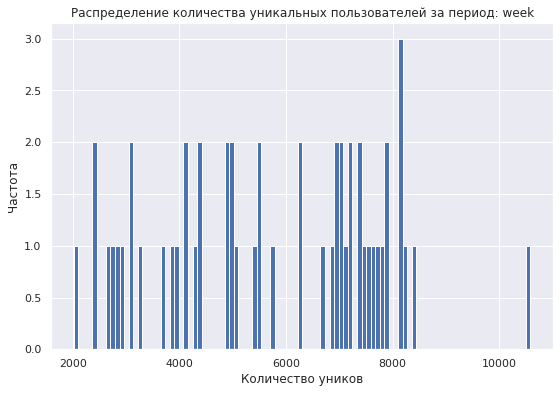

MAU: Среднее =  23228, Медиана = 24240


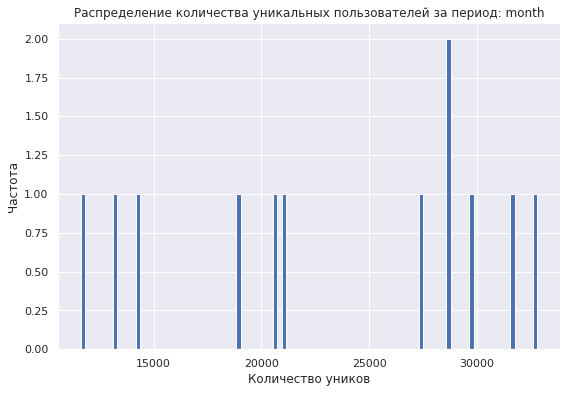

In [23]:
product_metrics(visits)

---

----------

## <span style="color:green">Комментарий от наставника<span>

Очень крутая реализация расчётов, молодец! 

---------

## Сколько сессий в день?
* В нашем датафрейме одна строка = одной сессии, применим агрегацию из прошлой задачки, но вместо nunique используем count.

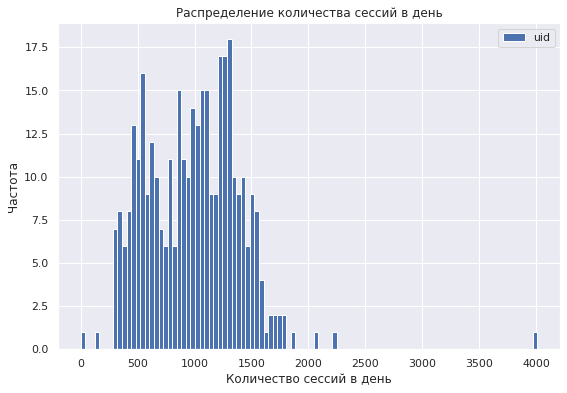

In [24]:
ax = visits.groupby(['year','month','date']).agg({'uid':'count'}).plot(kind='hist', bins=100)
ax.set(title='Распределение количества сессий в день', xlabel = 'Количество сессий в день', ylabel='Частота')
plt.show()

In [25]:
#график более-менее симметричный, можем взять среднее/медиану
visits.groupby(['year','month','date']).agg({'uid':['count']}).mean()[0].round()

985.0

In [26]:
visits.groupby(['year','month','date']).agg({'uid':['count']}).median()[0].round()

1000.0

# Вывод
* среднее число сессий в день: 985

---

## Сколько длится одна сессия?
* Длительность сессии это дельта между окончанием сессии и стартом, выразим ее в секундах

In [27]:
visits.head()

,uid,device,end_ts,source_id,start_ts,month,date,week,year
0,16879256277535980062,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,12,20,51,2017
1,104060357244891740,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,2,19,8,2018
2,7459035603376831527,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7,1,26,2017
3,16174680259334210214,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,5,20,20,2018
4,9969694820036681168,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,12,27,52,2017


In [28]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

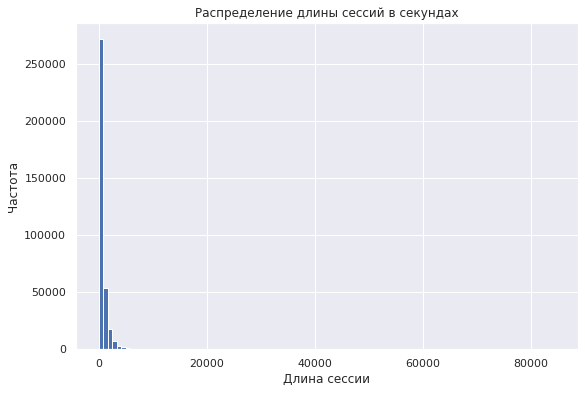

In [29]:
ax = visits['session_duration_sec'].plot(kind='hist', bins=100)
ax.set(title='Распределение длины сессий в секундах', ylabel='Частота',xlabel='Длина сессии')
plt.show()

#### Т.к. график смещенный и не симетричный, в качестве характеристики центральной тенденции используем моду

In [30]:
visits['session_duration_sec'].mode()[0]

60

# Вывод 
* Мода длины сессии равна 60 секундам

---

## Как часто люди возвращаются?
### На вопрос можно ответить двумя способами:
1. Среднее количество сессий на одного пользователя;
2. Среднее количество возвратов, для пользователей, которые возвращаются (имеют > 1 сессии). Возврат в моем понимании, это количество посещений минус один. 3 захода на сайт -> пользователь возвращался 2 раза:
    * Как часто -> сколько возвратов на пользователя было за период -> получить количество возвратов для всех уникальных -> охарактеризовать распределение

### Найдем среднее количество сеансов на уникального пользователя за весь период (группируя по месяцу/году)

In [31]:
def session_per_user(group):
    df = visits.groupby(group).agg({'uid':['nunique','count']})['uid']
    df['sess_per_user'] = df['count']/df['nunique']
    return df['sess_per_user'].mean()

In [32]:
print("Среднее количество сессий на пользователя в месяц {:.2f}".format(session_per_user(group=['year','month'])))

Среднее количество сессий на пользователя в месяц 1.28


In [33]:
print("Среднее количество сессий на пользователя в год {:.2f}".format(session_per_user(group=['year'])))

Среднее количество сессий на пользователя в год 1.47


### Найдем среднее количество возвратов на уникального возвращающегося пользователя
* Возвращающийся пользователь == уник, имеющий больше 2 сессий
* Чтобы ответить на вопрос, __о возвратах пользователя__, добавим в функцию фильтрацию записей по условию min_time != Start_Ts (либо вычтем из финального количества посещений единицу, тк первое посещение не считается возвратом)

In [34]:
def count_visits_in_period(df, period_month):
    temp = (df.groupby('uid').agg({'start_ts':'min'})\
          .rename(columns={'start_ts':'min_time'})\
          .reset_index()).merge(df)
    temp['point_date'] = temp['min_time'] + np.timedelta64(period_month,'M')
    temp = temp[(temp['start_ts'] <= temp['point_date']) & (temp['start_ts'] != temp['min_time'])]
    final_df = temp.groupby('uid').agg({'start_ts':'count'}).rename(columns={'start_ts':'count'})
    return final_df['count'].mean()

In [35]:
month = []
returned = []
for i in range(1,25):
    month.append(i)
    returned.append(count_visits_in_period(visits, i))
how_often_returned = pd.DataFrame({'month':month, 'count_returned':returned}).set_index('month')

In [36]:
how_often_returned

,count_returned
month,
1,1.621455
2,1.795290
3,1.932635
4,2.048262
5,2.149025
6,2.243904
7,2.321534
8,2.384303
9,2.440431


### Найдем как изменяется среднее количество возвратов на юзера с увеличением периода

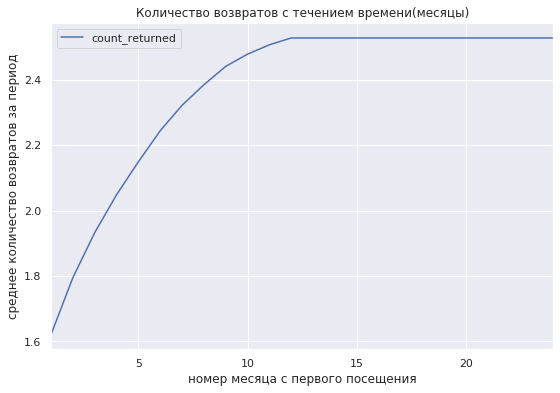

In [37]:
ax = how_often_returned.plot()
ax.set(title='Количество возвратов с течением времени(месяцы)', xlabel = 'номер месяца c первого посещения', 
       ylabel='среднее количество возвратов за период')
plt.show()

### Посчитаем Retention Rate по месячным когортам

In [38]:
def retention_rate(df):
    temp = (df.groupby('uid').agg({'start_ts':'min'}).rename(columns={'start_ts':'first_month'})\
                                                .reset_index()).merge(df, on='uid')
    temp['first_month'] = temp['first_month'].astype('datetime64[M]')
    temp['visit_month'] = temp['start_ts'].astype('datetime64[M]')
    temp['cohort_lifetime'] = ((temp['visit_month'] - temp['first_month'])/np.timedelta64(1,'M')).astype('int')
    cohorts = temp.groupby(['first_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
    users_in_zero_cohort = cohorts[cohorts['cohort_lifetime']==0][['first_month','uid']]\
                            .rename(columns={'uid':'cohort_users'})
    cohorts = cohorts.merge(users_in_zero_cohort, on='first_month')
    cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
    cohorts_pivot_table = cohorts.pivot_table(index='first_month', columns='cohort_lifetime', values='retention', aggfunc='mean')
    
    sns.set(style='white')
    sns.heatmap(cohorts_pivot_table, annot=True, fmt='.1%', linewidths=1, linecolor='gray')
    sns.set(rc={'figure.figsize':(14,8)})
    plt.show()
    return cohorts_pivot_table.fillna('')

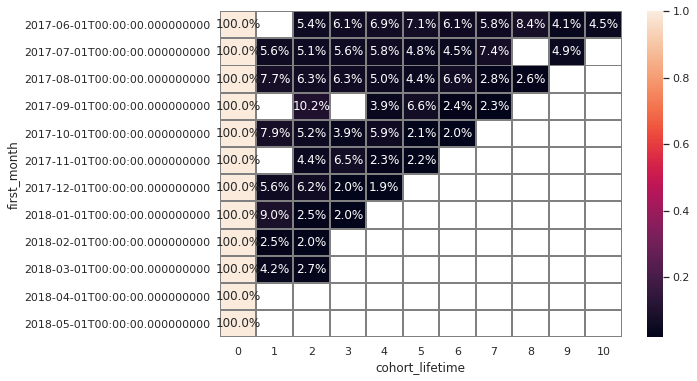

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10
first_month,,,,,,,,,,,
2017-06-01,1.0,,0.0537748,0.0613923,0.0685572,0.0714232,0.0610152,0.0577721,0.0840184,0.0406516,0.0449506
2017-07-01,1.0,0.0560883,0.0512938,0.0561644,0.0582192,0.0481735,0.0453577,0.0737443,,0.049239,
2017-08-01,1.0,0.076908,0.0628622,0.062764,0.0500933,0.0440035,0.0658089,0.0278951,0.0260289,,
2017-09-01,1.0,,0.10249,,0.0393918,0.0656729,0.0241858,0.0228089,,,
2017-10-01,1.0,0.078608,0.0522385,0.0389575,0.0588598,0.0213651,0.0203642,,,,
2017-11-01,1.0,,0.0441133,0.065069,0.0234146,0.0217998,,,,,
2017-12-01,1.0,0.0558018,0.0621339,0.0202628,0.0190359,,,,,,
2018-01-01,1.0,0.0898161,0.0249735,0.020244,,,,,,,
2018-02-01,1.0,0.0254539,0.0200928,,,,,,,,


In [39]:
retention_rate(visits)

---
---

## Продажи
* Когда люди начинают покупать?
* Сколько раз покупают за период?
* Какой средний чек?
* Сколько денег приносят? (LTV)

## Когда люди начинают покупать?
* Для ответа на этот вопрос необходимо найти среднее время с первой сессии до первой покупки для уникальных пользователей. Оставив только покупателей.

In [40]:
orders.groupby('uid').agg({'buy_ts':'count'}).reset_index().query('buy_ts > 1').shape

(6292, 2)

In [41]:
orders.groupby('uid').agg({'buy_ts':'count'}).reset_index().query('buy_ts == 1').shape

(30231, 2)

### Найдем для каждого уникального UID первую(минимальную) дату покупки

In [42]:
first_order = orders.groupby('uid').agg({'buy_ts':'min'})\
                .rename(columns={'buy_ts':'first_purchase_date'})\
                .reset_index()

In [43]:
first_order.head()

,uid,first_purchase_date
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


### Найдем дату первой сессии для каждого юзера, в датасете visits

In [44]:
first_visit = visits.groupby('uid').agg({'start_ts':'min'})\
                .rename(columns={'start_ts':'first_visit_date'})\
                .reset_index()

In [45]:
first_visit.head()

,uid,first_visit_date
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


### Объединим датафреймы со датой первого визита и датой перевой покупки, по UID
* Использую тип присоединения inner, потому что нам нужны пользователи, которые в итоге совершили покупку

In [46]:
delta_time_df = first_visit.merge(first_order, on='uid', how='inner')

### Найдем время между первым визитом и первым заказом

In [47]:
delta_time_df['delta'] = (delta_time_df['first_purchase_date'] - delta_time_df['first_visit_date']).dt.seconds

In [48]:
delta_time_df.head()

,uid,first_visit_date,first_purchase_date,delta
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,82920
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,4740
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,71040
4,2551852515556206,2017-11-24 11:22:00,2017-11-24 10:14:00,82320


### Получили большие значения, переведем дельту в минуты

In [49]:
delta_time_df['delta'] = delta_time_df['delta']/60

### Посмотрим на распределение

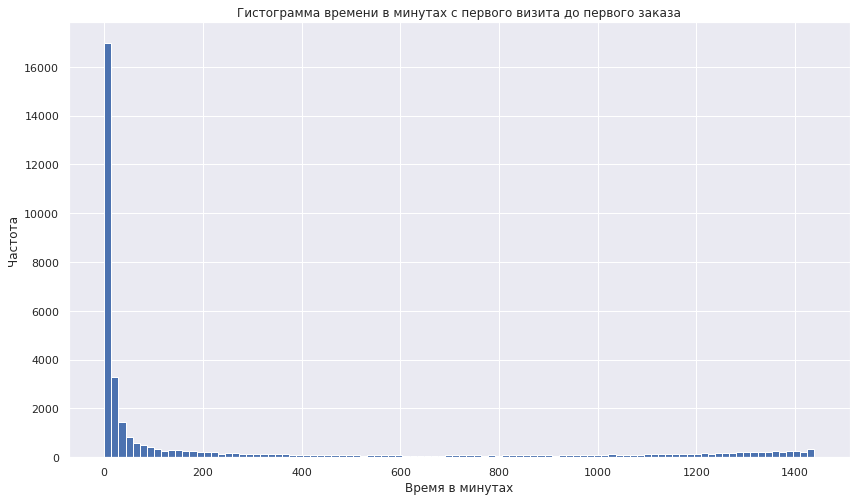

In [50]:
ax = delta_time_df['delta'].hist(bins=100)
ax.set(title='Гистограмма времени в минутах с первого визита до первого заказа', xlabel = 'Время в минутах', ylabel = 'Частота')
sns.set(rc={'figure.figsize':(9,6)})
plt.show()

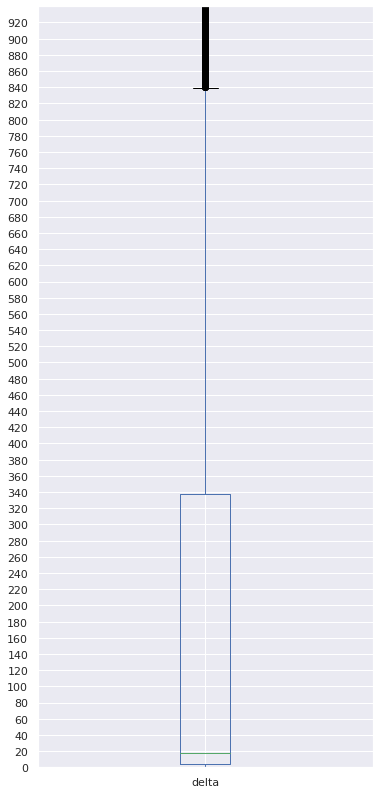

In [51]:
plot = delta_time_df.boxplot('delta', figsize=(6,14))
plot.set_ylim(0,940)
plot.set_yticks(range(0, 940, 20))
plt.show()

In [52]:
delta_time_df['delta'].median()

18.0

### Охарактеризуем данное распределение:

In [53]:
# выбираю моду
delta_time_df['delta'].mode()

0    1.0
dtype: float64

# Вывод: 
* Обычно, между первым визитом и покупкой проходит 1 минута

----------

## <span style="color:green">Комментарий от наставника<span>

Отличный анализ распределения, отдельно хочу похвалить подробные комментарии в разметке, сильно помогают ориентироваться в работе :)

---------

---

## Сколько раз покупают за период?

### Вначале найдем первый визит для каждого пользователя и смержим с датафреймом orders

In [54]:
uid_min_time = visits.groupby('uid').agg({'start_ts':'min'}).reset_index().rename(columns={'start_ts':'min_time'})

In [55]:
uid_min_time.shape[0]

228169

In [56]:
orders.uid.nunique()

36523

### Купивших уникальных пользователей намного меньше, чем пользователей всего. Оъединим датафреймы и проставим 0 покупок для тех, кто не покупал.

In [57]:
#применим левый джойн, чтобы оставить всех пользователей
df_orders_temp = uid_min_time.merge(orders, on='uid', how='left')

In [58]:
#отметим покупку как 1, а записи без покупки как 0
df_orders_temp['purchase'] = np.where(df_orders_temp.buy_ts.notna(), 1, 0)

### Для пользователей без покупок добавим максимальное время в столбец Buy_Ts для упрощения расчетов. Т.к. эти пользователи не сделаю покупку и за месяц и за полгода.

In [59]:
df_orders_temp['buy_ts'] = df_orders_temp['buy_ts'].fillna(df_orders_temp.buy_ts.max())

In [60]:
df_orders_temp['revenue'] = df_orders_temp['revenue'].fillna(0)

In [61]:
df_orders_temp.head()

,uid,min_time,buy_ts,revenue,purchase
0,11863502262781,2018-03-01 17:27:00,2018-06-01 00:02:00,0.00,0
1,49537067089222,2018-02-06 15:55:00,2018-06-01 00:02:00,0.00,0
2,297729379853735,2017-06-07 18:47:00,2018-06-01 00:02:00,0.00,0
3,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,0.55,1
4,325320750514679,2017-09-30 14:29:00,2018-06-01 00:02:00,0.00,0


In [62]:
def count_orders_in_period(temp, kind_user, type_period, period):
    '''
    Период type_period задается в виде неделя / месяц ('W' / 'M')
    Тип уникального пользователя kind_user - Все уники / Только покупатели ('all'/'purchasers')
    По каждому пользователю добавляем трешхолд: время первой покупки + период
    '''
    if type_period == 'M':
        temp['point_date'] = temp['min_time'] + np.timedelta64(period,'M')
    else:
        temp['point_date'] = temp['min_time'] + np.timedelta64(period,'W') 
    temp = temp[(temp['buy_ts'] <= temp['point_date'])]
    
    if kind_user == 'all':
        final_df = temp.groupby('uid').agg({'purchase':'sum'}).rename(columns={'purchase':'sum_purchase'})
    else:
        final_df = temp[temp['purchase']==1].groupby('uid').agg({'purchase':'sum'})\
            .rename(columns={'purchase':'sum_purchase'})
    ax = final_df['sum_purchase'].hist(bins=100)
    ax.set(title=f'Распределение количества покупок для {kind_user} пользователей за период {period}{type_period}',
          xlabel='Количество покупок', ylabel='Частота')
    mode_value = final_df['sum_purchase'].mode()[0]
    mean_value = final_df['sum_purchase'].mean()
    print(f'Мода количества покупок за период {str(period)+type_period} для {kind_user} = {mode_value}')
    print(f'Среднее количество покупок за период {str(period)+type_period} для {kind_user} = {mean_value:.2f}')

Мода количества покупок за период 6M для purchasers = 1
Среднее количество покупок за период 6M для purchasers = 1.32


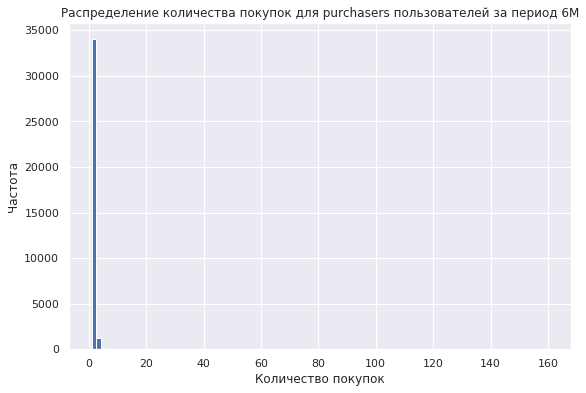

In [63]:
count_orders_in_period(df_orders_temp,'purchasers','M', 6)

Мода количества покупок за период 1W для all = 1
Среднее количество покупок за период 1W для all = 0.98


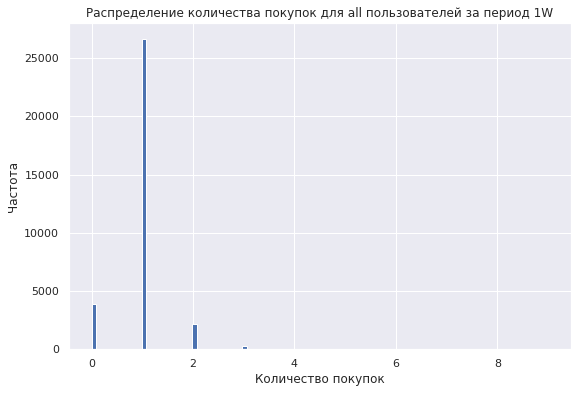

In [64]:
count_orders_in_period(df_orders_temp,'all','W', 1)

---

## Какой средний чек?
* Средний чек считается для покупателей, те мы не учитываем тех, кто не совершал покупки. Для анализа достаточно датафрейма orders.
    1. Рассчитаем средний чек за весь период в датафрейме
    2. Как изменяется средний чек по месяцам
    3. Изменение среднего чека в зависимости от даты первой покупки, когортный анализ. Выясним, тратят ли пользователи больше, по прошествию времени

### Средний чек за весь период данных в датафрейме

In [65]:
print('Средний чек за весь период = {:.2f} уе'.format(orders.revenue.sum()/orders.uid.nunique()))

Средний чек за весь период = 6.90 уе


### Посмотрим, как изменялся средний чек по месяцам

In [66]:
def mean_bill_by_month(df):
    df['order_month'] = df['buy_ts'].astype('datetime64[M]')
    mean_bill_df = df.groupby('order_month').agg({'uid':'nunique', 'revenue':'sum'})\
    .rename(columns={'uid':'unique_clients','revenue':'sum_revenue'})
    mean_bill_df['mean_bill'] = mean_bill_df['sum_revenue']/mean_bill_df['unique_clients']
    ax = mean_bill_df[['mean_bill']].plot()
    ax.set(title='Изменение среднего чека по месяцам', xlabel = 'месяц', 
       ylabel='Средний чек в уе')
    plt.show()

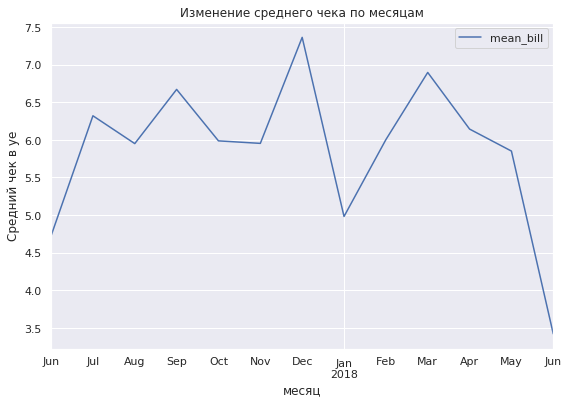

In [67]:
mean_bill_by_month(orders)

### Посмотрим, как изменялся средний чек в разных когортах, в зависимости от даты первого заказа
* Когорты для ARPPU

In [68]:
orders.head()

,buy_ts,revenue,uid,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01


In [69]:
#найдем дату первого заказа для каждого покупателя
first_order_date_by_customers = orders.groupby('uid')['buy_ts'].min()
first_order_date_by_customers.name = 'first_order_date'
orders = orders.join(first_order_date_by_customers,on='uid')

In [70]:
#определим дату первого заказа, переведем в datetime, первое число месяца
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')

In [71]:
#сгруппируем датафрейм по когортам (первый заказ, месяц заказа), выручку просуммируем, найдем количество уникальных покупателей 
orders_grouped_by_cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue':'sum','uid':'nunique'})\
                                .rename(columns={'uid':'unique_users'})

In [72]:
#посчитаем средний чек в каждом месяце(life_time) каждой когорты (по месяцу первого заказа)
orders_grouped_by_cohorts['mean_bill'] = orders_grouped_by_cohorts['revenue']/orders_grouped_by_cohorts['unique_users']

In [73]:
#посчитаем life_time внутри каждой группы
orders_grouped_by_cohorts = orders_grouped_by_cohorts.reset_index()
orders_grouped_by_cohorts['lifetime'] = orders_grouped_by_cohorts['order_month']-orders_grouped_by_cohorts['first_order_month']

In [74]:
#разделим life_time (дельта между первым заказом и последующим для каждого айди) на timegelty и округлим до целого числа
orders_grouped_by_cohorts['lifetime'] = (orders_grouped_by_cohorts['lifetime']/np.timedelta64(1,'M'))\
                                            .round().astype('int')

In [75]:
#оставим год и месяц
orders_grouped_by_cohorts['first_order_month'] = orders_grouped_by_cohorts['first_order_month'].dt.strftime('%Y-%m')

In [76]:
#развернем таблицу по номеру месяца внутри каждой когорты (lifetime)
pivot_mean_bill = orders_grouped_by_cohorts\
    .pivot_table(index='first_order_month', columns='lifetime', values='mean_bill', aggfunc='mean')

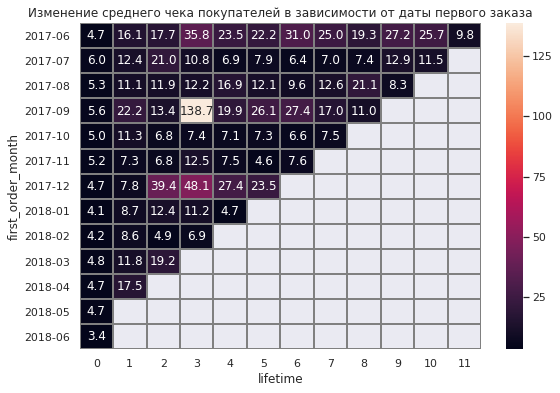

In [77]:
plt.title('Изменение среднего чека покупателей в зависимости от даты первого заказа')
sns.heatmap(pivot_mean_bill, annot=True, fmt='.1f', linewidths=1, linecolor='gray')
plt.show()

# Вывод
* Выделяются когорты привлеченных пользователей в июне, сентябре и декабре. Стоит проанализировать из каких каналов, по каким акциям они пришли и какие аудитории/ключевые слова были использованы, так же стоит проверить соотношение декстопа и мобайла.
* Неудачная закупка трафика была в феврале и октябре, стоит проанализировать сеансы по срезам, перечисленным выше
* Так же можно найти дельту(отклонение) от среднего по когорте

---

## Для последующих вычислений (LTV, ROI) соберем необходимые данные в один датафрейм (users)

In [78]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
orders = orders.rename(columns={'buy_ts':'buy_dt'})
orders = orders.set_index('uid')
orders['buy_month'] = orders['buy_dt'].astype('datetime64[M]')

In [79]:
costs = costs.rename(columns={'dt':'acquisition_date'})

In [80]:
visits.head()

,uid,device,end_ts,source_id,start_ts,month,date,week,year,session_duration_sec
0,16879256277535980062,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,12,20,51,2017,1080
1,104060357244891740,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,2,19,8,2018,1680
2,7459035603376831527,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7,1,26,2017,0
3,16174680259334210214,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,5,20,20,2018,1440
4,9969694820036681168,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,12,27,52,2017,0


In [81]:
# находим для каждого пользователя дату привлечения
users = visits.groupby('uid').agg({'start_ts':'min'}).rename(columns={'start_ts':'acquisition_dt'})

In [82]:
users = visits.set_index('uid').join(users)

In [83]:
users = users.query('start_ts == acquisition_dt')

In [84]:
## оставляем только те сессии, в которых начало сессии равно дате привлечения; находим девайс и источник привлечения
users = users.query('start_ts == acquisition_dt')[['acquisition_dt','device','source_id']]

In [85]:
#выделим отдельно дату 
users['acquisition_date'] = users['acquisition_dt'].dt.date
users['acquisition_date'] = pd.to_datetime(users['acquisition_date'])

In [86]:
#выделим отдельно месяц
users['acquisition_month'] = users['acquisition_dt'].astype('datetime64[M]')

In [87]:
costs = costs.set_index(['source_id','acquisition_date'])

In [88]:
users = users.reset_index().set_index(['source_id','acquisition_date'])

In [89]:
#добавляем в датафрейм users стоимость привлечения всей группы пользователей по определенному каналу в определенный день (без учета девайса)
users = users.join(costs, how='left')

In [90]:
#делаем временный датафрейм cac, в котором для каждого канала и даты привлечения считаем расходы на одного юзера
cac = (users.reset_index().groupby(['source_id','acquisition_date']).agg({'device':'count','costs':'max'})\
      .rename(columns={'device':'users'}))

In [91]:
#считаем CPA/CAC стоимость привлечения одного пользователя в каждой группе канал-дата привлечения
cac['acquisition_cost'] = cac['costs']/cac['users']

In [92]:
cac.head()

users  costs  acquisition_cost
source_id acquisition_date                                
1         2017-06-01           45  75.20          1.671111
          2017-06-02           27  62.25          2.305556
          2017-06-03           22  36.53          1.660455
          2017-06-04           24  55.00          2.291667
          2017-06-05           38  57.08          1.502105

In [93]:
#добавляем в датафрейм users стоимость привлечения кажого пользователя в одном источнике за конкретную дату
users = users.join(cac[['acquisition_cost','users']], how='left').reset_index()

In [94]:
users.head()

,source_id,acquisition_date,uid,acquisition_dt,device,acquisition_month,costs,acquisition_cost,users
0,1,2017-06-01,9714640286797951674,2017-06-01 21:45:00,desktop,2017-06-01,75.2,1.671111,45
1,1,2017-06-01,9909415513333099415,2017-06-01 13:24:00,touch,2017-06-01,75.2,1.671111,45
2,1,2017-06-01,10329302124590727494,2017-06-01 00:09:00,desktop,2017-06-01,75.2,1.671111,45
3,1,2017-06-01,10349500346348845391,2017-06-01 19:55:00,desktop,2017-06-01,75.2,1.671111,45
4,1,2017-06-01,10534330097262531592,2017-06-01 22:55:00,desktop,2017-06-01,75.2,1.671111,45


In [95]:
#когорты по месяцам, размер когорты, суммарная стоимость привлечения, стоимость на юзера
cohorts = (users.groupby('acquisition_month').agg({'device':'count','acquisition_cost':'sum'})
                                             .rename(columns={'device':'cohort_size'}))
cohorts['cac'] = cohorts['acquisition_cost']/cohorts['cohort_size']

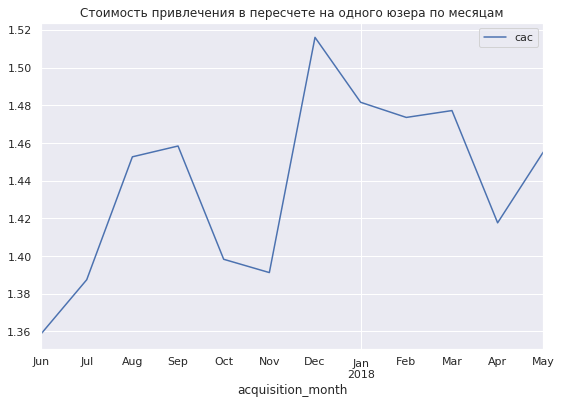

In [96]:
ax = cohorts[['cac']].plot()
ax.set(title='Стоимость привлечения в пересчете на одного юзера по месяцам')
plt.show()

----

## Посчитаем LTV

In [97]:
#добавим revenue к датафрейму users
ltv = orders.join(users.set_index('uid'), how='left')[['acquisition_month','order_month','revenue']]

In [98]:
ltv.head()

,acquisition_month,order_month,revenue
uid,,,
9223707061355654945,2017-10-01,2017-10-01,4.64
9224005701666002943,2017-12-01,2017-12-01,3.36
9224005701666002943,2017-12-01,2018-03-01,3.67
9225406053864431006,2017-09-01,2017-12-01,0.43
9225479525411867039,2018-02-01,2018-02-01,7.33


In [99]:
#считаем месяц внутри когорты, округляем
ltv['age_month'] = ((ltv['order_month']-ltv['acquisition_month'])/np.timedelta64(1,'M')).round().astype('int')

In [100]:
cohorts.head()

,cohort_size,acquisition_cost,cac
acquisition_month,,,
2017-06-01,13259,18015.00,1.358700
2017-07-01,13140,18230.81,1.387428
2017-08-01,10181,14789.17,1.452624
2017-09-01,16704,24360.36,1.458355
2017-10-01,25977,36322.88,1.398271


In [101]:
ltv = ltv.groupby(['acquisition_month','age_month']).agg({'revenue':'sum'})
#строим сводную таблицу по когортам
ltv = ltv.pivot_table(index='acquisition_month', columns='age_month', values='revenue', aggfunc='sum')
#добавляем накопительную сумму по каждой когорте
ltv = ltv.cumsum(axis=1)

In [102]:
ltv

age_month,0,1,2,3,4,5,6,7,8,9,10,11
acquisition_month,,,,,,,,,,,,
2017-06-01,9557.49,12222.07,13686.76,17568.85,21509.44,24333.92,27823.87,30094.68,32412.59,35894.23,38098.24,40026.05
2017-07-01,9874.89,10934.17,12043.07,13026.03,13873.02,14671.10,15259.10,16029.40,16753.92,17344.95,17812.11,NaN
2017-08-01,6234.81,7232.13,8233.48,9179.69,9989.73,10522.63,11009.28,12255.51,13086.15,13461.87,NaN,NaN
2017-09-01,12357.20,16057.68,18168.31,28607.24,29895.72,31805.77,32772.61,33263.99,33682.56,NaN,NaN,NaN
2017-10-01,18362.32,22172.15,23499.17,24557.22,25600.69,26622.88,27201.79,27857.69,NaN,NaN,NaN,NaN
2017-11-01,16531.79,19199.37,20542.22,21911.75,23020.49,23728.12,24426.72,NaN,NaN,NaN,NaN,NaN
2017-12-01,16857.00,18596.03,22794.33,27918.15,29375.72,31157.85,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,10597.01,12548.71,13713.47,14019.35,14546.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,11512.63,13497.09,14160.28,15061.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
#добавляем размер когорты, чтобы вычислить revenue(накопительный) на уникального пользователя
ltv = cohorts[['cohort_size']].join(ltv)

In [104]:
ltv = ltv.div(ltv['cohort_size'], axis=0).drop(columns = ['cohort_size'])
ltv.fillna('')

,0,1,2,3,4,5,6,7,8,9,10,11
acquisition_month,,,,,,,,,,,,
2017-06-01,0.720830,0.921794,1.03226,1.32505,1.62225,1.83528,2.09849,2.26975,2.44457,2.70716,2.87339,3.01878
2017-07-01,0.751514,0.832129,0.91652,0.991326,1.05579,1.11652,1.16127,1.21989,1.27503,1.32001,1.35556,
2017-08-01,0.612397,0.710356,0.80871,0.901649,0.981213,1.03356,1.08136,1.20376,1.28535,1.32225,,
2017-09-01,0.739775,0.961307,1.08766,1.7126,1.78973,1.90408,1.96196,1.99138,2.01644,,,
2017-10-01,0.706868,0.853530,0.904614,0.945345,0.985514,1.02486,1.04715,1.0724,,,,
2017-11-01,0.606716,0.704616,0.753898,0.80416,0.844851,0.870821,0.896459,,,,,
2017-12-01,0.667128,0.735952,0.902103,1.10488,1.16257,1.2331,,,,,,
2018-01-01,0.468397,0.554664,0.606147,0.619667,0.642982,,,,,,,
2018-02-01,0.518657,0.608059,0.637937,0.678528,,,,,,,,


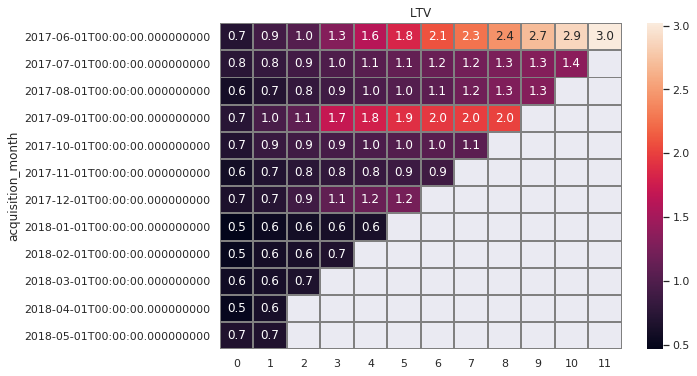

In [105]:
plt.title('LTV')
sns.heatmap(ltv, annot=True, fmt='.1f', linewidths=1, linecolor='gray')
plt.show()

### Через 10 месяцев в среднем каждый юзер приносит 2 ye

---
---
---

## Маркетинг
* Сколько денег потратили? Всего / на каждый источник / по времени
* Сколько стоило привлечение одного покупателя из каждого источника?
* На сколько окупились расходы? (ROI)
* Отобразите на графиках, как эти метрики отличаются по устройствам и по рекламным источникам? Как они меняются во времени?

## Сколько денег потратили? Всего / на каждый источник / по времени

In [106]:
def all_about_costs(df, start_date='2017-06-01', end_date='2018-05-31'):
    df.reset_index(inplace=True)
    df = df[(df['acquisition_date'] >= start_date) & (df['acquisition_date'] <= '2018-05-31')]
    total_cost = df['costs'].sum()
    print(f'Всего на маркетинг за период потратили = {total_cost}')
    ax = df.groupby('source_id').agg({'costs':'sum'}).plot(kind='bar')
    ax.set(title='Расходы по каждому источнику за период', xlabel='Источник', ylabel='Расходы')
    plt.show()

Всего на маркетинг за период потратили = 329131.62


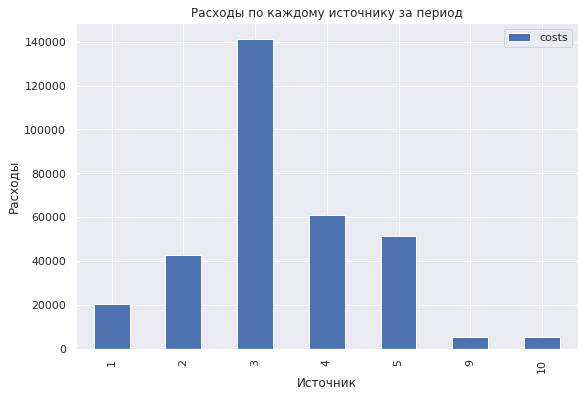

In [107]:
all_about_costs(costs) #за весь период

Всего на маркетинг за период потратили = 44513.65


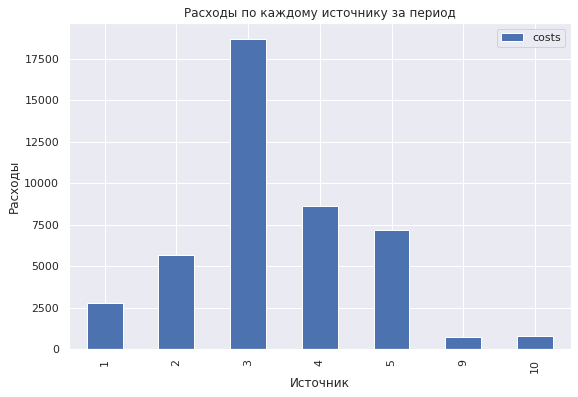

In [108]:
all_about_costs(costs, start_date = '2018-04-01', end_date='2019-05-03') #за указанный период

### Найдем расходы в разрезе по источникам и девайсам

In [109]:
costs_by_source_device = users.groupby(['source_id','device']).agg({'acquisition_cost':'sum'})

In [110]:
costs_by_source_device

acquisition_cost
source_id device                   
1         desktop      13898.142092
          touch         6935.127908
2         desktop      28367.388969
          touch        14438.651031
3         desktop     107000.340786
          touch        34321.289214
4         desktop      39735.813659
          touch        21337.786341
5         desktop      37923.378582
          touch        13833.021418
6         desktop          0.000000
7         desktop          0.000000
          touch            0.000000
9         desktop       4039.062809
          touch         1415.357191
10        desktop       4104.185267
          touch         1716.934733

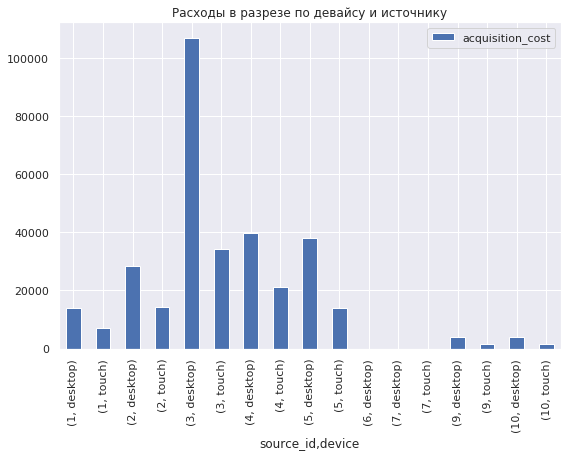

In [111]:
ax = costs_by_source_device.plot(kind='bar')
ax.set(title='Расходы в разрезе по девайсу и источнику')
plt.show()

---

## Сколько стоило привлечение одного покупателя из каждого источника?

In [112]:
#находим сумму расходов по каждому каналу
costs_temp = costs.groupby('source_id').agg({'costs':'sum'})
#находим первый визит по каждому пользователю, мержим его к каждому пользователю в исходном датафрейме
first_visits = (visits.groupby('uid').agg({'start_ts':'min'}).rename(columns={'start_ts':'first_visit'})\
                .reset_index()).merge(visits, on='uid')
#оставляем в датафрейме только первые визиты по каждому пользователю, сохраняем каналы привлечения
first_visits = first_visits.query('first_visit == start_ts')
#мержим заказы по каждому пользователю
#группируем по каналу, находим количество уникальных покупателей в каждом канале
purchasers_in_source = (orders.merge(first_visits, on='uid', how='inner')).groupby('source_id').agg({'uid':'nunique'})\
                        .rename(columns={'uid':'count_purchasers'})

In [113]:
orders.head()

,buy_dt,revenue,order_month,first_order_date,first_order_month,buy_month
uid,,,,,,
10329302124590727494,2017-06-01 00:10:00,17.00,2017-06-01,2017-06-01 00:10:00,2017-06-01,2017-06-01
11627257723692907447,2017-06-01 00:25:00,0.55,2017-06-01,2017-06-01 00:25:00,2017-06-01,2017-06-01
17903680561304213844,2017-06-01 00:27:00,0.37,2017-06-01,2017-06-01 00:27:00,2017-06-01,2017-06-01
16109239769442553005,2017-06-01 00:29:00,0.55,2017-06-01,2017-06-01 00:29:00,2017-06-01,2017-06-01
14200605875248379450,2017-06-01 07:58:00,0.37,2017-06-01,2017-06-01 07:58:00,2017-06-01,2017-06-01


In [114]:
first_visits.head()

,uid,first_visit,device,end_ts,source_id,start_ts,month,date,week,year,session_duration_sec
0,11863502262781,2018-03-01 17:27:00,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,3,1,9,2018,360
1,49537067089222,2018-02-06 15:55:00,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2,6,6,2018,120
2,297729379853735,2017-06-07 18:47:00,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,6,7,23,2017,60
4,313578113262317,2017-09-18 22:49:00,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,9,18,38,2017,1080
6,325320750514679,2017-09-30 14:29:00,desktop,2017-09-30 14:38:00,5,2017-09-30 14:29:00,9,30,39,2017,540


In [115]:
visits.head()

,uid,device,end_ts,source_id,start_ts,month,date,week,year,session_duration_sec
0,16879256277535980062,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,12,20,51,2017,1080
1,104060357244891740,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,2,19,8,2018,1680
2,7459035603376831527,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7,1,26,2017,0
3,16174680259334210214,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,5,20,20,2018,1440
4,9969694820036681168,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,12,27,52,2017,0


In [116]:
temp = purchasers_in_source.join(costs_temp)

In [117]:
temp['cac'] = temp['costs'] / temp['count_purchasers']

In [118]:
#проверка, подсчет costs через датафрейм users
# (users.groupby(['source_id','acquisition_date']).agg({'costs':'max'})\
#      .reset_index()).groupby('source_id').agg({'costs':'sum'})

In [119]:
temp.sort_values('cac')

,count_purchasers,costs,cac
source_id,,,
10,1327,5822.49,4.387709
9,1074,5517.49,5.137328
4,10280,61073.60,5.941012
1,2920,20833.27,7.134682
5,6960,51757.10,7.436365
2,3497,42806.04,12.240789
3,10464,141321.63,13.505507
7,1,NaN,NaN


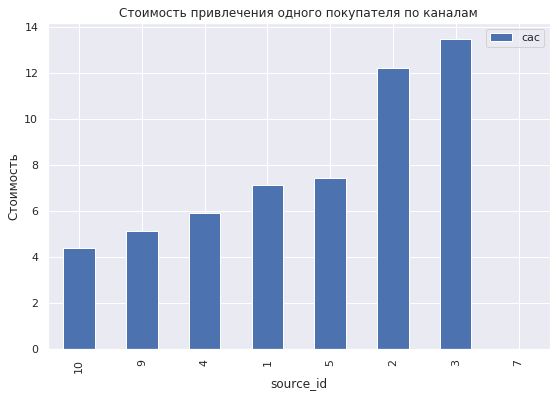

In [120]:
ax = temp.sort_values('cac')[['cac']].plot(kind='bar')
ax.set(title='Стоимость привлечения одного покупателя по каналам', ylabel='Стоимость')
plt.show()

---

## На сколько окупились расходы? (ROI)
* ROI =  (итоговая прибыль − инвестиции) / инвестиции

### Найдем расходы по каналам

In [121]:
costs_by_sourse = (users.groupby(['source_id','acquisition_date']).agg({'costs':'max'})\
     .reset_index()).groupby('source_id').agg({'costs':'sum'})

In [122]:
#подготовим данные
roi_df = orders.join(users.set_index('uid'), how='left')

### Найдем доходы по источникам

In [123]:
revenue_by_sourse = roi_df.groupby('source_id').agg({'revenue':'sum'})

In [124]:
roi = revenue_by_sourse.join(costs_by_sourse)
roi['roi'] = (roi['revenue'] - roi['costs'])/roi['costs']

In [125]:
roi.sort_values('roi')

,revenue,costs,roi
source_id,,,
3,54391.15,141321.63,-0.615125
10,4457.40,5821.12,-0.234271
4,56682.99,61073.60,-0.071890
9,5666.56,5454.42,0.038893
5,54407.71,51756.40,0.051227
2,46574.17,42806.04,0.088028
1,29876.00,20833.27,0.434052
7,1.22,0.00,inf


### Источники, которые окупились: 1, 2, 5, 9
* Лучший источник: source_id = 1

---

### Посчитаем окупаемость в разрезе источников и девайсов

In [126]:
revenue_source_device = orders.join(users.set_index('uid')).reset_index().groupby(['source_id','device'])\
                                .agg({'revenue':'sum','uid':'nunique'})\
                                .rename(columns={'uid':'unique_purchaser'})

In [127]:
revenue_source_device = revenue_source_device[['revenue']].join(costs_by_source_device)

In [128]:
revenue_source_device['roi'] = ((revenue_source_device['revenue'] - revenue_source_device['acquisition_cost'])/revenue_source_device['acquisition_cost'])

In [129]:
revenue_source_device

revenue  acquisition_cost       roi
source_id device                                       
1         desktop  24852.23      13898.142092  0.788169
          touch     5023.77       6935.127908 -0.275605
2         desktop  40021.53      28367.388969  0.410829
          touch     6552.64      14438.651031 -0.546174
3         desktop  46299.69     107000.340786 -0.567294
          touch     8091.46      34321.289214 -0.764244
4         desktop  43304.16      39735.813659  0.089802
          touch    13378.83      21337.786341 -0.372998
5         desktop  48521.33      37923.378582  0.279457
          touch     5886.38      13833.021418 -0.574469
7         desktop      1.22          0.000000       inf
9         desktop   4778.33       4039.062809  0.183029
          touch      888.23       1415.357191 -0.372434
10        desktop   3574.15       4104.185267 -0.129145
          touch      883.25       1716.934733 -0.485566

# Вывод
#### Какие источники/платформы вы бы порекомендовали?
Источники, которые окупились: 9,5,2,1. При этом в срезе по устройствам, практически во всех источниках окупились пользователи, пришедшие с десктопов. Рекомендуется снизить цену клика, либо полностью отключить тач устройства.

#### Объясните свой выбор: на какие метрики вы ориентируетесь?
ROI, Revenue, CAC

#### Какие выводы вы сделали, узнав значение метрик?
* Стоимость привлечения тач устройств дешевле, но они не окупаются.
* В среднем юзеры возвращаются 2 раза
* Максимальная стоимость привлечения наблюдается в декабре, так же в декабре и самый большой средний чек.
* Через 10 месяцев в среднем каждый юзер приносит 2 ye

----------

## <span style="color:green">Общий комментарий от наставника<span>

Отличная работа с подробными комментариями и красивым оформлением. Молодец :)

---------